In [1]:
#%matplotlib widget
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('dark_background')
#xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)  
#ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)
# We generate xs and ys as below.
# hm: How many datapoints will be created?
# varaince: how vairable distributon inside the variance.
# step: Each time, the y value increase/decrease by step. 
# correlation: positive, negative,or none (True, False).
def create_dataset (hm, variance, step=2, correlation=True):   
    val = 1 # starting value
    ys = []
    for i in range(hm): # how many points
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step    
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))] # i = 1, 2, 3, 4, ...
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
    
def best_fit_slope(xs, ys):
    m  = (mean(xs) * mean(ys) - mean (xs*ys)) / \
    (mean(xs)**2 - mean (xs**2))
    # We have the slope.
    # Now, we need to calculate the intercept.
    b = mean(ys) - m * mean (xs)
    return m, b

def squared_error (ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination (ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regre = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - squared_error_regre/squared_error_y_mean

# Change variance to 10.
xs, ys = create_dataset (40, 10, 2, correlation="pos")
m, b = best_fit_slope(xs, ys)
regression_line = [(m*x)+b for x in xs]
predict_x = 8
predict_y = (m * predict_x) + b
r_squared = coefficient_of_determination(ys, regression_line)
print('r_squared:', r_squared) 
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=200, color='r') # set size = 200
plt.plot(xs, regression_line)
plt.show()

r_squared: 0.9405391707590435


r_squared: 0.02048041680155055


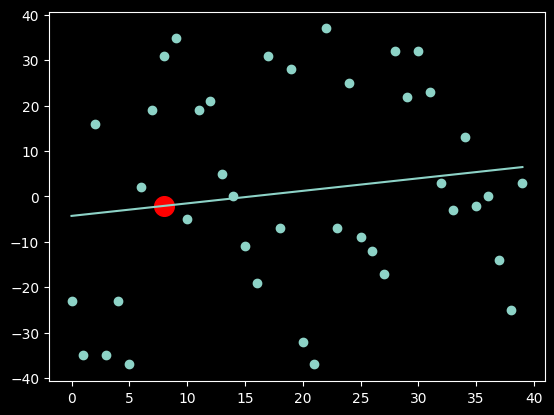

In [2]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('dark_background')
#xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)  
#ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)
# We generate xs and ys as below.
# hm: How many datapoints will be created?
# varaince: how vairable distributon inside the variance.
# step: Each time, the y value increase/decrease by step. 
# correlation: positive, negative,or none (True, False).
def create_dataset (hm, variance, step=2, correlation=True):   
    val = 1 # starting value
    ys = []
    for i in range(hm): # how many points
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step    
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))] # i = 1, 2, 3, 4, ...
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
    
def best_fit_slope(xs, ys):
    m  = (mean(xs) * mean(ys) - mean (xs*ys)) / \
    (mean(xs)**2 - mean (xs**2))
    # We have the slope.
    # Now, we need to calculate the intercept.
    b = mean(ys) - m * mean (xs)
    return m, b

def squared_error (ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination (ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regre = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - squared_error_regre/squared_error_y_mean

# Change variance to False.
xs, ys = create_dataset (40, 40, 2, correlation=False)
m, b = best_fit_slope(xs, ys)
regression_line = [(m*x)+b for x in xs]
predict_x = 8
predict_y = (m * predict_x) + b
r_squared = coefficient_of_determination(ys, regression_line)
print('r_squared:', r_squared) 
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=200, color='r') # set size = 200
plt.plot(xs, regression_line)
plt.show()

In [2]:
#%matplotlib widget
import pandas as pd
import nasdaqdatalink
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pprint
style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier
forecast_out = int(math.ceil(0.1*len(df)))  # Predict with 10% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]          # from top to bottom 10%
X_lately = X_scale[-forecast_out:]   # from bottom to 10%
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days
print('forecast_set[:5]')
print(forecast_set[:5])
print('accuracy: ', accuracy)
print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
last_date_all = df.iloc[-1]
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
last_unix = last_date.timestamp()
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day  
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot(color='b')
df['Forecast'].plot(color='r')
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

forecast_set[:5]
[961.49002463 948.56741935 978.71071815 972.96300751 984.40723783]
accuracy:  0.8773137455646474
froecast_out: 343
